In [5]:
import numpy as np
import matplotlib; matplotlib.rcParams['figure.figsize']=(4,3)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib import pyplot as plt
plt.style.use('dark_background')
import GPy
from IPython.display import display

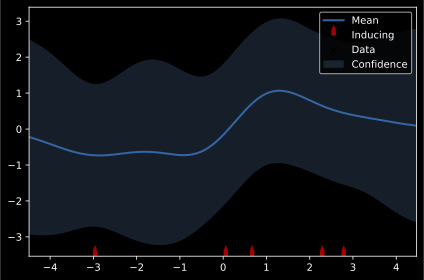

In [4]:
m = GPy.examples.regression.sparse_GP_regression_1D(plot=True, optimize=False)

## Examining the model using print statement

In [3]:
# The Objective shows the log-likelihood
m

sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


In [4]:
m.inducing_inputs

index,sparse_gp.inducing_inputs,constraints,priors
[0 0],-1.91701274,,
[1 0],-2.98063962,,
[2 0],2.75075653,,
[3 0],1.32134770,,
[4 0],-2.44611553,,


 C:\Users\Sina\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


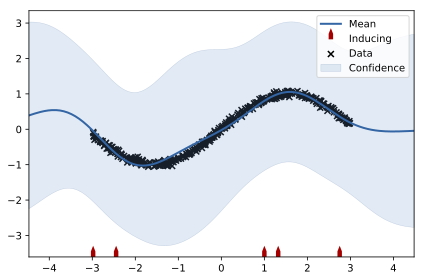

In [5]:
m.inducing_inputs[0] = 1
m.inducing_inputs
fig = m.plot()

## Interacting with parameters

 C:\Users\Sina\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


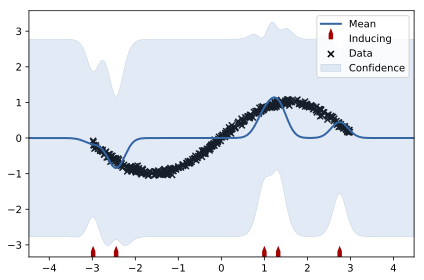

In [6]:
# The Objective shows the log-likelihood has changed to 604 due to change in hyperparameter lengthscale
m.rbf.lengthscale = 0.2
m
fig2= m.plot()

## Regular Expressions

In [7]:
print(m['.*var'])
print("variances as np.array: ", m['.*var'].values())
print("np.array of rbf matches: ", m['.*rbf'].values())

  index  |             sparse_gp.rbf.variance  |  constraints  |  priors
  [0]    |                         1.00000000  |      +ve      |        
  -----  |  sparse_gp.Gaussian_noise.variance  |  -----------  |  ------
  [0]    |                         1.00000000  |      +ve      |        
variances as np.array:  [1. 1.]
np.array of rbf matches:  [1.  0.2]



Name : sparse_gp
Objective : 690.9711442804793
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |   value  |  constraints  |  priors
  inducing_inputs          |  (5, 1)  |               |        
  rbf.variance             |     2.0  |      +ve      |        
  rbf.lengthscale          |     0.2  |      +ve      |        
  Gaussian_noise.variance  |     2.0  |      +ve      |        

Name : sparse_gp
Objective : 712.2877298852197
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |   value  |  constraints  |  priors
  inducing_inputs          |  (5, 1)  |               |        
  rbf.variance             |     2.0  |      +ve      |        
  rbf.lengthscale          |     0.2  |      +ve      |        
  Gaussian_noise.variance  |     3.0  |      +ve      |        


 C:\Users\Sina\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


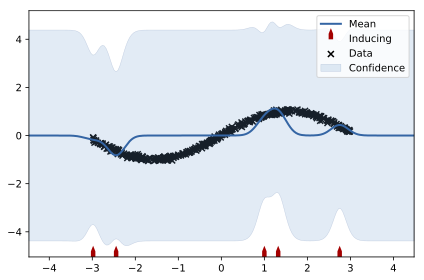

In [8]:
m['.*var']=2
print(m)
m['.*var'] = [2., 3.]
print(m)
fig3 = m.plot()

In [9]:
print(m[''])

  index  |          sparse_gp.inducing_inputs  |  constraints  |  priors
  [0 0]  |                         1.00000000  |               |        
  [1 0]  |                        -2.98063962  |               |        
  [2 0]  |                         2.75075653  |               |        
  [3 0]  |                         1.32134770  |               |        
  [4 0]  |                        -2.44611553  |               |        
  -----  |             sparse_gp.rbf.variance  |  -----------  |  ------
  [0]    |                         2.00000000  |      +ve      |        
  -----  |          sparse_gp.rbf.lengthscale  |  -----------  |  ------
  [0]    |                         0.20000000  |      +ve      |        
  -----  |  sparse_gp.Gaussian_noise.variance  |  -----------  |  ------
  [0]    |                         3.00000000  |      +ve      |        


## Setting and fetching parameters: parameter_array

[-4.  -2.   0.   2.   4.   0.1  2.   0.7]

Name : sparse_gp
Objective : 323.02674681122835
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |   value  |  constraints  |  priors
  inducing_inputs          |  (5, 1)  |               |        
  rbf.variance             |     0.1  |      +ve      |        
  rbf.lengthscale          |     2.0  |      +ve      |        
  Gaussian_noise.variance  |     0.7  |      +ve      |        


 C:\Users\Sina\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


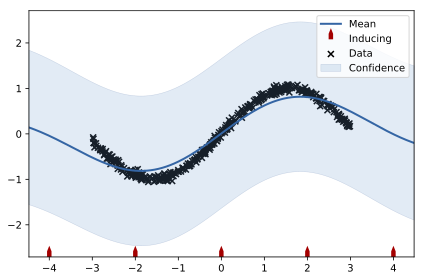

In [10]:
new_params = np.r_[[-4, -2, 0,2,4],[0.1, 2], [0.7]]
print(new_params)
m[:]= new_params
print(m)
fig4 = m.plot()

  index  |  sparse_gp.inducing_inputs  |  constraints  |  priors
  [0 0]  |                -4.00000000  |               |        
  [1 0]  |                -2.00000000  |               |        
  [2 0]  |                 1.00000000  |               |        
  [3 0]  |                 3.00000000  |               |        
  [4 0]  |                 5.00000000  |               |        


 C:\Users\Sina\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


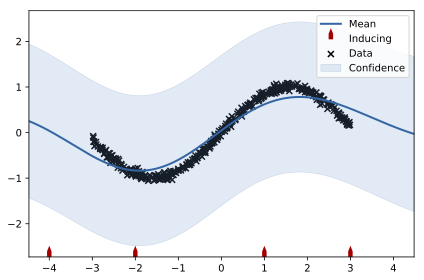

In [11]:
m.inducing_inputs[2:, 0] = [1,3,5]
print(m.inducing_inputs)
fig4 = m.plot()

In [12]:
precision = 1./m.Gaussian_noise.variance
print(precision)

[1.42857143]


## Getting the model Parameter's gradients

all gradients of the model: 
 [   2.34090796    4.16287391    1.38222956   -0.39474352   -0.44980765
  103.36406664  -13.20400829 -267.33504505]

 gradients of the rbf kernel: 
 [103.36406664 -13.20400829]


 C:\Users\Sina\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


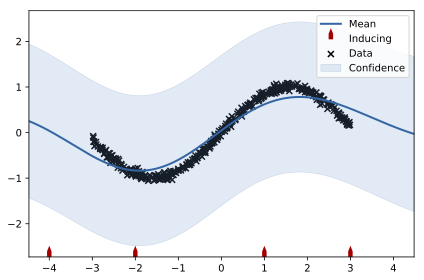

In [13]:
print("all gradients of the model: \n", m.gradient)
print("\n gradients of the rbf kernel: \n", m.rbf.gradient)
fig6 = m.plot()

[ 1.08477761e-03 -9.52134419e-04 -4.50053741e-04 -6.46491196e-04
  1.22487795e-03  4.97100657e-04 -1.14386603e-03 -8.17180932e-01]


 C:\Users\Sina\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


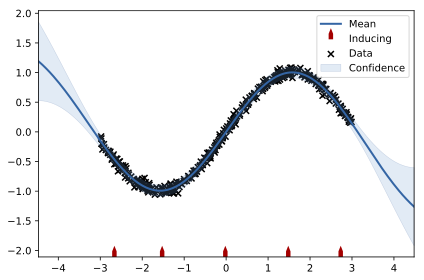

In [14]:
m.optimize()
print(m.gradient)
fig6 = m.plot()

## Adjusting the model's constraints

In [15]:
print(m)


Name : sparse_gp
Objective : -617.6758523056778
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |                  value  |  constraints  |  priors
  inducing_inputs          |                 (5, 1)  |               |        
  rbf.variance             |     1.4999614997090216  |      +ve      |        
  rbf.lengthscale          |      2.546648732281391  |      +ve      |        
  Gaussian_noise.variance  |  0.0023330720909143917  |      +ve      |        


In [16]:
# use unconstrain() to remove constrain on a parameter
m.rbf.variance.unconstrain()
print(m)


Name : sparse_gp
Objective : -617.6758523056778
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |                  value  |  constraints  |  priors
  inducing_inputs          |                 (5, 1)  |               |        
  rbf.variance             |     1.4999614997090216  |               |        
  rbf.lengthscale          |      2.546648732281391  |      +ve      |        
  Gaussian_noise.variance  |  0.0023330720909143917  |      +ve      |        


In [17]:
m.unconstrain()
print(m)


Name : sparse_gp
Objective : -617.6758523056778
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |                  value  |  constraints  |  priors
  inducing_inputs          |                 (5, 1)  |               |        
  rbf.variance             |     1.4999614997090216  |               |        
  rbf.lengthscale          |      2.546648732281391  |               |        
  Gaussian_noise.variance  |  0.0023330720909143917  |               |        



Name : sparse_gp
Objective : -617.6758523056778
Number of Parameters : 8
Number of Optimization Parameters : 7
Updates : True
Parameters:
  sparse_gp.               |                  value  |  constraints  |  priors
  inducing_inputs          |                 (5, 1)  |    {fixed}    |        
  rbf.variance             |     1.4999614997090216  |      +ve      |        
  rbf.lengthscale          |      2.546648732281391  |      +ve      |        
  Gaussian_noise.variance  |  0.0023330720909143917  |               |        

Name : sparse_gp
Objective : -617.6758523056778
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |                  value  |  constraints  |  priors
  inducing_inputs          |                 (5, 1)  |               |        
  rbf.variance             |     1.4999614997090216  |      +ve      |        
  rbf.lengthscale          |      2.546648732281391  |      +ve      |        
  Gaussian_

 C:\Users\Sina\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


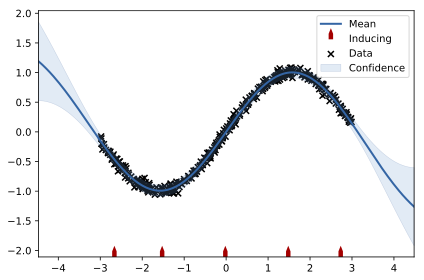

In [18]:
m.inducing_inputs[0].fix()
m.rbf.constrain_positive()
print(m)
m.unfix()
print(m)
fig6 = m.plot()

## Tying Parameters

### Optimizing the model

In [19]:
m.Gaussian_noise.constrain_positive()
m.rbf.constrain_positive()
m.optimize()

reconstraining parameters sparse_gp.rbf



Name : sparse_gp
Objective : -617.6758523412282
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |                  value  |  constraints  |  priors
  inducing_inputs          |                 (5, 1)  |               |        
  rbf.variance             |     1.4999638230932044  |      +ve      |        
  rbf.lengthscale          |     2.5466412073495475  |      +ve      |        
  Gaussian_noise.variance  |  0.0023330377234151312  |      +ve      |        


 C:\Users\Sina\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


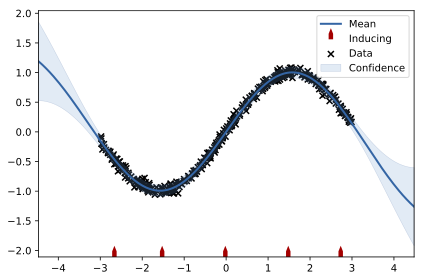

In [20]:
print(m)
fig8 = m.plot()

In [103]:
# GPy.plotting.change_plotting_library('plotly')
# fig10 = m.plot(plot_density=True)
# GPy.plotting.show(fig, filename='gpy_sparse_gp_example')

In [3]:
# sample inputs and outputs
X = np.random.uniform(-3.,3.,(50,2))
Y = np.sin(X[:,0:1]) * np.sin(X[:,1:2])+np.random.randn(50,1)*0.05

# define kernel
ker = GPy.kern.Matern52(2,ARD=True) + GPy.kern.White(2)

# create simple GP model
m = GPy.models.GPRegression(X,Y,ker)

# optimize and plot
m.optimize(messages=True,max_f_eval = 1000)


In [7]:
print (np.shape(X))
print(np.shape(Y))

(50, 2)
(50, 1)


 C:\Users\sinad\anaconda3\lib\site-packages\GPy\plotting\matplot_dep\plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


AttributeError: 'dict' object has no attribute 'figure'

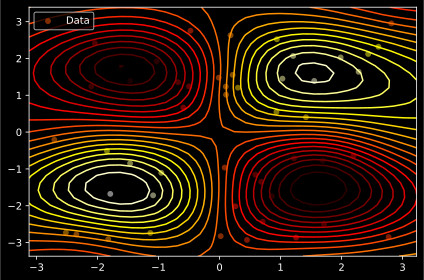

In [6]:
fig = m.plot()
display(GPy.plotting.show(fig, filename='basic_gp_regression_notebook_2d'))
display(m)